In [1]:
import numpy as np

In [2]:
import gymnasium as gym
env = gym.make("FrozenLake-v1", render_mode="human")

In [196]:
class agent:
    def __init__(self, env, α = 0.2, γ = 0.7, ϵ = 0.9):
        self.env = env
        ## -- ##
        self.num_states = int(self.env.observation_space.n)
        self.num_actions = int(self.env.action_space.n)
        self.states = [i for i in range(self.num_states)]
        self.actions = [i for i in range(self.num_actions)]
        self.Q = np.zeros((self.num_states, self.num_actions))
        ## -- ##
        self.alpha = α
        self.gamma = γ
        self.epsilon = ϵ
        ### -- ##
        self.current_state = 0
        self.current_action = 0 
        self.reward = 0
        ## -- ##
        self.counter = 0
        self.container = []
        self.container_ = []
        ## -- ##
    def update(self, next_action, next_state, reward):
        ## Expected sarsa we do here!!!!
        max_term = sum([self.policy(next_state)(a)*self.Q[next_state, a] for a in self.actions])
        ## TD(0)
        #max_term = self.Q[next_state, next_action]
        ## Q-learning
        #max_term = self.Q.argmax(-1)[next_state]
        ##
        self.Q[self.current_state, self.current_action] += self.alpha*(reward + self.gamma*(max_term)
                                                          -  self.Q[self.current_state, self.current_action])
        self.reward += (reward - self.reward)/(self.counter+1)
        self.counter += 1
        ## -- ##
    def take_action(self, state = None):
        if state == None:
            return self.env.action_space.sample()
        choice = np.random.rand()
        if choice < self.epsilon:
            action = env.action_space.sample()
        else:
            action = self.Q.argmax(-1)[state]
        return action
    
    def policy(self, state, return_dist = False):
        epsilon = 1e-2
        greedy_policy = self.Q.argmax(-1)
        policy_ = lambda state_: 1 - epsilon + epsilon/self.num_states if state_ == greedy_policy[state] else epsilon/self.num_states
        if return_dist:
            dist = np.number([policy_(i) for i in self.actions])
            return policy_, dist
        return policy_
    
    def reset(self):
        self.container.append(self.reward)
        self.container_.append(self.counter)
        ## -- ##
        self.counter = 0
        self.reward = 0
        self.current_state = 0
        self.current_action = 0

In [197]:
env = gym.make("FrozenLake-v1",is_slippery=True)
agent_ = agent(env, ϵ = 0.9, γ = 0.7, α = 0.2)
env.reset()

(0, {'prob': 1})

In [201]:
### One episode
from tqdm import tqdm
for i in tqdm(range(50000)):

    while True:
        next_state, reward, terminated, truncated, info = env.step(agent_.current_action)
        next_action = agent_.take_action(next_state)
        agent_.update(next_action, next_state, reward)
        
        agent_.current_action = next_action
        agent_.current_state = next_state

        if terminated or truncated:
            agent_.reset()
            observation, info = env.reset()
            break
        if agent_.epsilon > 0.2:
            agent_.epsilon /= 1.00001

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4896.58it/s]


In [193]:
agent_.epsilon

0.19999898343584563

In [202]:
Q = np.number(agent_.Q, dtype = np.float16) ## This dude is the Q function
print(Q)

[[0.002918 0.00199  0.002981 0.002089]
 [0.001699 0.001704 0.002403 0.003168]
 [0.006912 0.0062   0.006165 0.00555 ]
 [0.002638 0.002968 0.001514 0.003521]
 [0.00574  0.003649 0.002058 0.001322]
 [0.       0.       0.       0.      ]
 [0.01086  0.016    0.02321  0.002789]
 [0.       0.       0.       0.      ]
 [0.004936 0.006706 0.02457  0.00807 ]
 [0.02339  0.05664  0.03128  0.03232 ]
 [0.10315  0.02942  0.0739   0.03217 ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.05145  0.05856  0.08215  0.05725 ]
 [0.1748   0.2874   0.1847   0.1523  ]
 [0.       0.       0.       0.      ]]


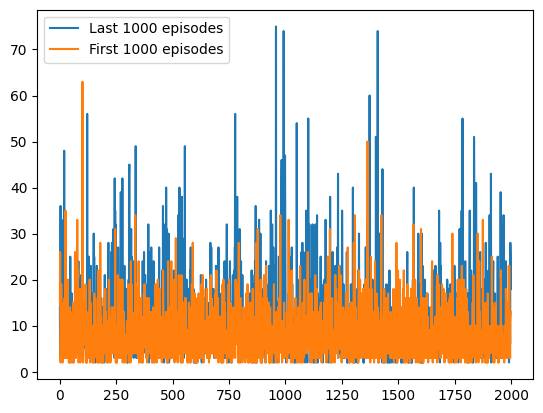

In [205]:
from matplotlib import pyplot as plt
plt.plot(agent_.container_[-2000:], label ="Last 1000 episodes")
plt.plot(agent_.container_[:2000], label = "First 1000 episodes")
plt.legend()
plt.show()